In [1]:
import os
!echo "CUDA Path: $CUDA_HOME"

CUDA Path: /software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u


In [2]:
cuda_path = "/software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u"
os.environ['XLA_FLAGS'] = f'--xla_gpu_cuda_data_dir={cuda_path}'

# Cell 2: Verify CUDA installation (using Python, not shell variables)
print("Checking CUDA files:")
# Use Python to check the directory
import os
libdevice_path = os.path.join(cuda_path, "nvvm", "libdevice")
if os.path.exists(libdevice_path):
    print(f"Found libdevice directory: {libdevice_path}")
    print("Contents:", os.listdir(libdevice_path))
else:
    print(f"ERROR: Directory not found: {libdevice_path}")
    print("Try finding libdevice with:")
    print(f"!find {cuda_path} -name 'libdevice.10.bc' 2>/dev/null")

# Cell 3: Direct shell command (no Python variables)
print("\nDirect shell check:")
!ls /software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u

Checking CUDA files:
Found libdevice directory: /software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u/nvvm/libdevice
Contents: ['libdevice.10.bc']

Direct shell check:
bin		   gds	     nsight-compute-2022.3.0  pkgconfig  tools
compute-sanitizer  gds-11.8  nsightee_plugins	      README	 version.json
DOCS		   include   nsight-systems-2022.4.2  share
EULA.txt	   lib64     nvml		      src
extras		   libnvvp   nvvm		      targets


In [3]:
os.environ['CUDA_HOME'] = cuda_path
os.environ['CUDA_ROOT'] = cuda_path
os.environ['CUDA_PATH'] = cuda_path
os.environ['LD_LIBRARY_PATH'] = f"{cuda_path}/lib64:" + os.environ.get('LD_LIBRARY_PATH', '')
os.environ['XLA_FLAGS'] = f'--xla_gpu_cuda_data_dir={cuda_path}'

In [4]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'

print(f"🔧 CUDA Configuration:")
print(f"   CUDA_HOME: {os.environ.get('CUDA_HOME')}")
print(f"   XLA_FLAGS: {os.environ.get('XLA_FLAGS')}")

🔧 CUDA Configuration:
   CUDA_HOME: /software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u
   XLA_FLAGS: --xla_gpu_cuda_data_dir=/software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u


In [5]:
libdevice_path = os.path.join(cuda_path, "nvvm", "libdevice", "libdevice.10.bc")
if os.path.exists(libdevice_path):
    print(f"   ✅ Found libdevice: {libdevice_path}")
else:
    print(f"   ❌ ERROR: libdevice not found at {libdevice_path}")

   ✅ Found libdevice: /software/spackages_v0_21_prod/apps/linux-ubuntu22.04-icelake/gcc-13.2.0/cuda-11.8.0-xod3wh3ft3br2z5fgm6hrkcz5vbx4a5u/nvvm/libdevice/libdevice.10.bc


In [6]:
import tensorflow as tf

# Check TensorFlow version and GPU availability
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# More detailed GPU info
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Number of GPUs: {len(gpus)}")
    for i, gpu in enumerate(gpus):
        print(f"GPU {i}: {gpu}")
        
    # Check GPU memory info
    gpu_details = tf.config.experimental.get_device_details(gpus[0])
    print(f"GPU Details: {gpu_details}")
else:
    print("No GPUs found")

2025-06-11 15:06:32.920861: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 15:06:34.171856: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-11 15:06:34.171950: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-11 15:06:34.171975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-11 15:06:34.301032: I tensorflow/core/platform/cpu_feature_g

TensorFlow version: 2.14.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Number of GPUs: 1
GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU Details: {'compute_capability': (8, 0), 'device_name': 'NVIDIA A100-SXM4-40GB MIG 1g.5gb'}


In [7]:
import tensorflow as tf

# Configure GPU memory growth to avoid allocation issues
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth for all GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ Configured memory growth for {len(gpus)} GPUs")
    except RuntimeError as e:
        print(f"❌ GPU configuration error: {e}")

# Test GPU computation
with tf.device('/GPU:0'):
    # Simple test to verify GPU is working
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)
    print(f"✅ GPU computation successful. Result shape: {c.shape}")

✅ Configured memory growth for 1 GPUs


2025-06-11 15:07:04.157984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3076 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 1g.5gb, pci bus id: 0000:17:00.0, compute capability: 8.0


✅ GPU computation successful. Result shape: (1000, 1000)


In [8]:
import os
import numpy as np
import time
import math
from pathlib import Path
from types import MethodType
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tifffile
from tifffile import memmap
import matplotlib.pyplot as plt

# N2V imports
from n2v.models import N2VConfig, N2V
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import n2v.models as n2v_mod

# Set random seeds for reproducibility
np.random.seed(42)

print("🚀 Starting N2V 2D Training and Prediction Script")
print("=" * 60)

🚀 Starting N2V 2D Training and Prediction Script


In [9]:
def load_tiff_files(folder_path):
    """Load TIFF files from folder as memory maps"""
    print(f"📂 Loading TIFF files from: {folder_path}")
    memmaps = []
    
    for file in os.listdir(folder_path):
        if file.endswith('.tif') or file.endswith('.tiff'):
            img_path = os.path.join(folder_path, file)
            img = memmap(img_path)
            memmaps.append(img)
            print(f"  ✅ Loaded: {file} | Shape: {img.shape} | Size: {img.nbytes/1e9:.2f} GB")
    
    print(f"📊 Total images loaded: {len(memmaps)}")
    return memmaps

In [10]:
def extract_patches_from_image(img, patches_per_slice=50, patch_size=(64, 64), 
                              trim_slices=5, intensity_threshold=0.1):
    """Extract high-quality patches from a single image"""
    patches = []
    z, y, x = img.shape

    # Skip images smaller than patch size
    if y < patch_size[0] or x < patch_size[1]:
        print(f"  ⚠️ Image too small: {img.shape}, skipping")
        return np.array(patches)
    
    # Adjust z range to skip first and last 'trim_slices'
    z_start = trim_slices
    z_end = z - trim_slices

    if z_start >= z_end:
        print(f"  ⚠️ All slices would be trimmed, skipping")
        return np.array(patches)
    
    print(f"  🔍 Processing slices {z_start} to {z_end-1}")
    
    for z_idx in range(z_start, z_end):
        slice_2d = img[z_idx]
        slice_mean = np.mean(slice_2d)
        slice_std = np.std(slice_2d)
        
        # Skip nearly empty slices
        if slice_std < intensity_threshold * slice_mean:
            continue
            
        valid_patches = 0
        attempts = 0
        max_attempts = patches_per_slice * 3
        
        while valid_patches < patches_per_slice and attempts < max_attempts:
            y0 = np.random.randint(0, y - patch_size[0])
            x0 = np.random.randint(0, x - patch_size[1])
            patch = slice_2d[y0:y0 + patch_size[0], x0:x0 + patch_size[1]]
            
            # Check patch quality - ensure it has sufficient structure
            patch_std = np.std(patch)
            patch_mean = np.mean(patch)
            
            if patch_std > intensity_threshold * patch_mean and patch_mean > 0:
                patches.append(patch.astype(np.float32))
                valid_patches += 1
            
            attempts += 1
    
    print(f"  ✅ Extracted {len(patches)} quality patches")
    return np.array(patches)

In [11]:
def extract_patches_parallel(memmap_list, patches_per_slice=50, patch_size=(64, 64), 
                           trim_slices=5, intensity_threshold=0.1):
    """Extract patches from multiple images in parallel"""
    print(f"🔄 Extracting patches with parameters:")
    print(f"  - Patches per slice: {patches_per_slice}")
    print(f"  - Patch size: {patch_size}")
    print(f"  - Trim slices: {trim_slices}")
    print(f"  - Intensity threshold: {intensity_threshold}")
    
    all_patches = []
    all_indices = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(extract_patches_from_image, img, patches_per_slice, 
                                 patch_size, trim_slices, intensity_threshold)
                   for img in memmap_list]
        
        for idx, future in enumerate(tqdm(as_completed(futures), total=len(futures), 
                                        desc="Processing Images")):
            patches = future.result()
            if len(patches) > 0:
                all_patches.append(patches)
                all_indices.extend([idx] * len(patches))

    if not all_patches:
        raise ValueError("No patches extracted! Check your intensity threshold and image quality.")
    
    all_patches = np.concatenate(all_patches, axis=0)
    all_indices = np.array(all_indices)
    
    print(f"📊 Total patches extracted: {len(all_patches)}")
    return all_patches, all_indices


In [12]:
def calculate_normalization_stats(patches, percentile_range=(1, 99)):
    """Calculate robust normalization statistics using percentiles"""
    print(f"📐 Calculating normalization statistics...")
    
    # Use percentile-based normalization for robustness
    p_low, p_high = np.percentile(patches, percentile_range)
    mean_intensity = np.mean(patches)
    std_intensity = np.std(patches)
    
    print(f"  - {percentile_range[0]}th percentile: {p_low:.4f}")
    print(f"  - {percentile_range[1]}th percentile: {p_high:.4f}")
    print(f"  - Mean intensity: {mean_intensity:.4f}")
    print(f"  - Std intensity: {std_intensity:.4f}")
    
    return p_low, p_high

In [13]:
def normalize_patches(patches, p_low, p_high):
    """Normalize patches using calculated statistics"""
    normalized = np.clip((patches - p_low) / (p_high - p_low + 1e-8), 0, 1)
    print(f"  ✅ Normalized {len(patches)} patches to range [0, 1]")
    return normalized.astype(np.float32)

In [14]:
def split_patches_per_image(patches, indices, val_fraction=0.2):
    """Split patches ensuring validation data comes from all images"""
    print(f"🔀 Splitting data: {val_fraction*100}% for validation")
    
    train_patches = []
    val_patches = []

    unique_images = np.unique(indices)
    for img_id in unique_images:
        img_patches = patches[indices == img_id]
        if len(img_patches) > 0:
            train, val = train_test_split(img_patches, test_size=val_fraction, 
                                        random_state=42, shuffle=True)
            train_patches.append(train)
            val_patches.append(val)

    train_data = np.concatenate(train_patches) if train_patches else np.array([])
    val_data = np.concatenate(val_patches) if val_patches else np.array([])
    
    print(f"  ✅ Train: {len(train_data)} patches")
    print(f"  ✅ Validation: {len(val_data)} patches")
    
    return train_data, val_data

In [15]:
def create_n2v_config(X_train):
    """Create optimized N2V configuration"""
    print("⚙️ Creating N2V configuration...")
    
    config = N2VConfig(
        X_train,
        unet_kern_size=3,
        train_steps_per_epoch=10,  # Increased for better training
        train_epochs=100,
        train_loss='mse',
        batch_norm=True,
        train_batch_size=8,  # Reduced for stability
        n2v_perc_pix=0.5,  # Increased masking percentage
        n2v_patch_shape=(64, 64),
        n2v_manipulator='uniform_withCP',
        n2v_neighborhood_radius=2,  # Smaller radius for 2D
        unet_n_depth=3,  # Sufficient depth
        unet_n_first=64,  # Good starting number of features
        train_tensorboard=True
    )
    
    print("  ✅ Configuration created successfully")
    return config

In [16]:
def patched_prepare_for_training(self, optimizer=None, **kwargs):
    """Patched method to fix weight saving issues"""
    self.callbacks = []

    def patched_save_weights(this, filepath, *args, **kwargs):
        if not str(filepath).endswith('.weights.h5'):
            filepath = Path(str(filepath).replace('.h5', '.weights.h5'))
        return this._original_save_weights(filepath, *args, **kwargs)

    if not hasattr(self.keras_model, "_original_save_weights"):
        self.keras_model._original_save_weights = self.keras_model.save_weights
        self.keras_model.save_weights = MethodType(patched_save_weights, self.keras_model)

    if self.config.train_checkpoint is not None:
        self.callbacks.append(
            ModelCheckpoint(
                str(self.logdir / self.config.train_checkpoint),
                save_best_only=True,
                save_weights_only=True
            )
        )
        self.callbacks.append(
            ModelCheckpoint(
                str(self.logdir / 'weights_now.weights.h5'),
                save_best_only=False,
                save_weights_only=True
            )
        )

    if self.config.train_tensorboard:
        from tensorflow.keras.callbacks import TensorBoard
        self.callbacks.append(TensorBoard(log_dir=str(self.logdir)))

In [36]:
def predict_with_consistent_norm(model, slice_2d, p_low, p_high):
    """Predict with consistent normalization"""
    # Normalize using training statistics
    slice_norm = np.clip((slice_2d - p_low) / (p_high - p_low + 1e-8), 0, 1)
    slice_norm = slice_norm[..., np.newaxis].astype(np.float32)
    
    # Predict
    denoised = model.predict(slice_norm, axes='YXC', n_tiles=(4, 4, 1))
    
    # Convert back to original scale
    denoised = denoised.squeeze() * (p_high - p_low) + p_low
    
    return denoised

In [42]:
def predict_large_tiff_improved(model, input_path, output_path, p_low, p_high, 
                              batch_size=8, max_batches=None):
    """Improved prediction function with consistent normalization"""
    print("🔄 Starting improved prediction...")
    print(f"📂 Input: {input_path}")
    print(f"💾 Output: {output_path}")
    print(f"📦 Batch size: {batch_size}")
    print(f"📐 Normalization: [{p_low:.4f}, {p_high:.4f}]")

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Memory-map the input TIFF
    mmapped = tifffile.memmap(input_path)
    z_size = mmapped.shape[0]

    print(f"🧠 Total slices (Z): {z_size}")
    total_batches = math.ceil(z_size / batch_size)
    print(f"🔢 Total batches to run: {total_batches}")

    with tifffile.TiffWriter(output_path, bigtiff=True) as tif_out:
        for batch_idx, start_z in enumerate(range(0, z_size, batch_size)):
            if max_batches is not None and batch_idx >= max_batches:
                print(f"🛑 Stopped early at batch {batch_idx} (max_batches={max_batches})")
                break

            end_z = min(start_z + batch_size, z_size)
            print(f"\n🚀 Batch {batch_idx+1}/{total_batches} | Processing slices {start_z}–{end_z-1}")

            try:
                batch = mmapped[start_z:end_z]

                for i in range(batch.shape[0]):
                    slice_idx = start_z + i
                    slice_2d = batch[i, :, :]

                    # Check if slice has sufficient content
                    if np.std(slice_2d) < 1e-8:
                        print(f"⚠️ Slice {slice_idx} is nearly flat. Copying original.")
                        tif_out.write(slice_2d.astype(np.float32), contiguous=True)
                        continue

                    # Predict with consistent normalization
                    denoised = predict_with_consistent_norm(model, slice_2d, p_low, p_high)
                    
                    # Quality check
                    if np.any(np.isnan(denoised)) or np.any(np.isinf(denoised)):
                        print(f"⚠️ Invalid values in slice {slice_idx}. Using original.")
                        tif_out.write(slice_2d.astype(np.float32), contiguous=True)
                    else:
                        tif_out.write(denoised.astype(np.float32), contiguous=True)
                    
                    if slice_idx % 10 == 0:  # Print progress every 10 slices
                        print(f"✅ Processed slice {slice_idx}", flush=True)

            except KeyboardInterrupt:
                print("⚠️ Interrupted by user. Exiting gracefully.")
                break
            except Exception as e:
                print(f"❌ Error at batch {batch_idx+1}: {e}")
                break

    print("\n🎉 Denoising complete!")

In [18]:
def visualize_results(original_slice, normalized_slice, denoised_slice, slice_idx=0):
    """Visualize original, normalized, and denoised slices"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(original_slice, cmap='gray')
    axes[0].set_title(f'Original (Slice {slice_idx})')
    axes[0].axis('off')
    
    axes[1].imshow(normalized_slice, cmap='gray')
    axes[1].set_title('Normalized [0,1]')
    axes[1].axis('off')
    
    axes[2].imshow(denoised_slice, cmap='gray')
    axes[2].set_title('Denoised')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"Original range: [{np.min(original_slice):.4f}, {np.max(original_slice):.4f}]")
    print(f"Normalized range: [{np.min(normalized_slice):.4f}, {np.max(normalized_slice):.4f}]")
    print(f"Denoised range: [{np.min(denoised_slice):.4f}, {np.max(denoised_slice):.4f}]")

In [19]:
print("🎯 Starting N2V Pipeline")
    
# Configuration
folder = "../Image_Data/E14.5_TOGF_noCre_data/Deconvolved_data/"
model_name = 'n2v_2D_improved_20250610'
basedir = '../models'

🎯 Starting N2V Pipeline


In [20]:
# Input/Output paths for prediction
input_path = "../Image_Data/E14.5_TOGF_noCre_data/Deconvolved_data/250410_12.43.29_LV_Ventral_500um_Current.cube.tif"
output_path = "../Image_Data/E14.5_denoised/250410_12.43.29_LV_Ventral_500um_Current.cube.tif"

In [21]:
memmaps = load_tiff_files(folder)
if not memmaps:
    raise ValueError("No TIFF files found!")

📂 Loading TIFF files from: ../Image_Data/E14.5_TOGF_noCre_data/Deconvolved_data/
  ✅ Loaded: 250410_12.50.04_RV_Ventral_500um_Current.cube.tif | Shape: (506, 2048, 2048) | Size: 4.24 GB
  ✅ Loaded: 250410_12.55.01_LA_Ventral_500um_Current.cube.tif | Shape: (506, 2048, 2048) | Size: 4.24 GB
  ✅ Loaded: 250410_12.43.29_LV_Ventral_500um_Current.cube.tif | Shape: (506, 2048, 2048) | Size: 4.24 GB
  ✅ Loaded: 250410_12.59.39_RA_Ventral_500um_Current.cube.tif | Shape: (506, 2048, 2048) | Size: 4.24 GB
📊 Total images loaded: 4


In [22]:
patches, patch_image_indices = extract_patches_parallel(
    memmaps, 
    patches_per_slice=10,  # Adjust based on your needs
    patch_size=(64, 64),
    trim_slices=5,
    intensity_threshold=0.05  # Lowered threshold
)

🔄 Extracting patches with parameters:
  - Patches per slice: 10
  - Patch size: (64, 64)
  - Trim slices: 5
  - Intensity threshold: 0.05
  🔍 Processing slices 5 to 500
  🔍 Processing slices 5 to 500
  🔍 Processing slices 5 to 500
  🔍 Processing slices 5 to 500


Processing Images: 100%|██████████| 4/4 [00:12<00:00,  3.00s/it]

  ✅ Extracted 4958 quality patches
  ✅ Extracted 4960 quality patches
  ✅ Extracted 4960 quality patches
  ✅ Extracted 4960 quality patches
📊 Total patches extracted: 19838


In [23]:
patches = patches[..., np.newaxis]
print(f"📊 Final patch shape: {patches.shape}")

📊 Final patch shape: (19838, 64, 64, 1)


In [24]:
p_low, p_high = calculate_normalization_stats(patches, percentile_range=(1, 99))

📐 Calculating normalization statistics...
  - 1th percentile: 0.0000
  - 99th percentile: 9199.0000
  - Mean intensity: 1729.3011
  - Std intensity: 1987.9496


In [25]:
patches_normalized = normalize_patches(patches.squeeze(), p_low, p_high)
patches_normalized = patches_normalized[..., np.newaxis]

  ✅ Normalized 19838 patches to range [0, 1]


In [26]:
X_train, X_val = split_patches_per_image(
    patches_normalized, patch_image_indices, val_fraction=0.2
)

🔀 Splitting data: 20.0% for validation
  ✅ Train: 15870 patches
  ✅ Validation: 3968 patches


In [27]:
print(f"📊 Training shape: {X_train.shape}")
print(f"📊 Validation shape: {X_val.shape}")

📊 Training shape: (15870, 64, 64, 1)
📊 Validation shape: (3968, 64, 64, 1)


In [28]:
config = create_n2v_config(X_train)

⚙️ Creating N2V configuration...
  ✅ Configuration created successfully


In [29]:
n2v_mod.N2V.prepare_for_training = patched_prepare_for_training

In [30]:
# Create model
model = N2V(config=config, name=model_name, basedir=basedir)
model.config.train_checkpoint = "weights_best.weights.h5"

/cephfs/volumes/hpc_data_prj/cmm_stroud/25f618d6-2e01-44f4-94db-6cac7f9ae884/n2v/n2v/models/n2v_standard.py:447: UserWarning: output path for model already exists, files may be overwritten: /cephfs/volumes/hpc_data_prj/cmm_stroud/25f618d6-2e01-44f4-94db-6cac7f9ae884/models/n2v_2D_improved_20250610
  warnings.warn(


In [31]:
model

N2V(n2v_2D_improved_20250610): YXC → YXC
├─ Directory: /cephfs/volumes/hpc_data_prj/cmm_stroud/25f618d6-2e01-44f4-94db-6cac7f9ae884/models/n2v_2D_improved_20250610
└─ N2VConfig(means=['0.18528885'], stds=['0.20374157'], n_dim=2, axes='YXC', n_channel_in=1, n_channel_out=1, unet_residual=False, unet_n_depth=3, unet_kern_size=3, unet_n_first=64, unet_last_activation='linear', unet_input_shape=(None, None, 1), train_loss='mse', train_epochs=100, train_steps_per_epoch=10, train_learning_rate=0.0004, train_batch_size=8, train_tensorboard=True, train_checkpoint='weights_best.weights.h5', train_reduce_lr={'factor': 0.5, 'patience': 10}, batch_norm=True, n2v_perc_pix=0.5, n2v_patch_shape=(64, 64), n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=2, single_net_per_channel=True, blurpool=False, skip_skipone=False, structN2Vmask=None, probabilistic=False)

In [32]:
model.keras_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

In [33]:
print("🚂 Starting training...")
start_time = time.time()
history = model.train(X_train, X_val)
training_time = time.time() - start_time
print(f"⏱️ Training completed in {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

🚂 Starting training...
20 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 3968/3968 [00:01<00:00, 2413.79it/s]


Epoch 1/100


2025-06-10 15:46:25.015981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2025-06-10 15:46:25.852080: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7a9523d16610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-06-10 15:46:25.852122: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-06-10 15:46:25.852128: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA L40S, Compute Capability 8.9
2025-06-10 15:46:25.856802: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-10 15:46:25.976813: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - 9s 245ms/step - loss: 0.2473 - mae: 0.3275 - val_loss: 0.0053 - val_mae: 0.0137
Epoch 2/100
10/10 [==============================] - 1s 100ms/step - loss: 0.0897 - mae: 0.1834 - val_loss: 0.0057 - val_mae: 0.0241
Epoch 3/100
10/10 [==============================] - 1s 95ms/step - loss: 0.0495 - mae: 0.1344 - val_loss: 0.0065 - val_mae: 0.0375
Epoch 4/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0323 - mae: 0.1064 - val_loss: 0.0071 - val_mae: 0.0438
Epoch 5/100
10/10 [==============================] - 1s 84ms/step - loss: 0.0258 - mae: 0.0935 - val_loss: 0.0076 - val_mae: 0.0490
Epoch 6/100
10/10 [==============================] - 1s 86ms/step - loss: 0.0228 - mae: 0.0865 - val_loss: 0.0078 - val_mae: 0.0512
Epoch 7/100
10/10 [==============================] - 1s 78ms/step - loss: 0.0181 - mae: 0.0738 - val_loss: 0.0079 - val_mae: 0.0522
Epoch 8/100
10/10 [==============================] - 1s 77ms/step - loss: 0.0164 - mae

In [52]:
print("\n🧪 Testing prediction on a single slice...")
test_img = tifffile.memmap(input_path)
middle_slice_idx = test_img.shape[0] // 2
test_slice = test_img[15]


🧪 Testing prediction on a single slice...


In [53]:
# Test prediction
normalized_test = np.clip((test_slice - p_low) / (p_high - p_low + 1e-8), 0, 1)
denoised_test = predict_with_consistent_norm(model, test_slice, p_low, p_high)

100%|██████████| 16/16 [00:00<00:00, 27.47it/s]   


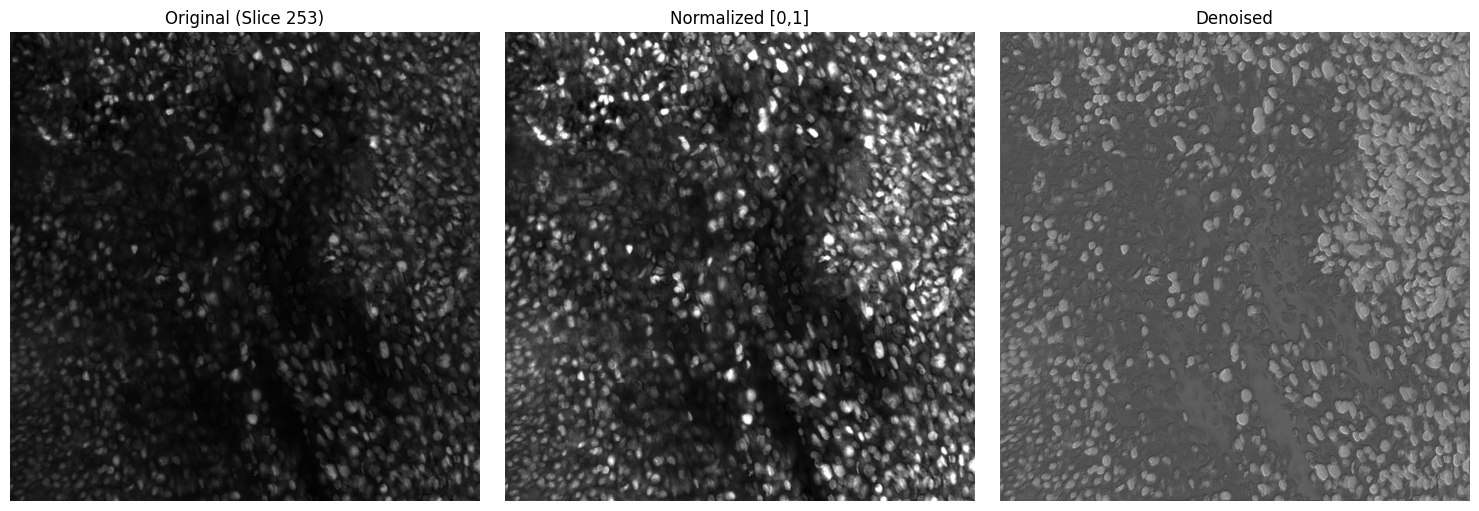

Original range: [347.0000, 20301.0000]
Normalized range: [0.0377, 1.0000]
Denoised range: [1588.0967, 1909.4683]


In [54]:
visualize_results(test_slice, normalized_test, denoised_test, middle_slice_idx)

In [14]:
### Keep this function
def predict_with_per_slice_norm(model, slice_2d):
    """Normalize each slice individually"""
    p_low = np.percentile(slice_2d, 0.5)
    p_high = np.percentile(slice_2d, 99.5)
    slice_norm = np.clip((slice_2d - p_low) / (p_high - p_low + 1e-8), 0, 1)
    denoised = model.predict(slice_norm[..., np.newaxis], axes='YXC', n_tiles=(4,4,1))
    return denoised.squeeze() * (p_high - p_low) + p_low

In [41]:
def predict_large_tiff_improved_slice(model, input_path, output_path, p_low, p_high, 
                              batch_size=8, max_batches=None):
    """Improved prediction function with consistent normalization"""
    print("🔄 Starting improved prediction...")
    print(f"📂 Input: {input_path}")
    print(f"💾 Output: {output_path}")
    print(f"📦 Batch size: {batch_size}")
    print(f"📐 Normalization: [{p_low:.4f}, {p_high:.4f}]")

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Memory-map the input TIFF
    mmapped = tifffile.memmap(input_path)
    z_size = mmapped.shape[0]

    print(f"🧠 Total slices (Z): {z_size}")
    total_batches = math.ceil(z_size / batch_size)
    print(f"🔢 Total batches to run: {total_batches}")

    with tifffile.TiffWriter(output_path, bigtiff=True) as tif_out:
        for batch_idx, start_z in enumerate(range(0, z_size, batch_size)):
            if max_batches is not None and batch_idx >= max_batches:
                print(f"🛑 Stopped early at batch {batch_idx} (max_batches={max_batches})")
                break

            end_z = min(start_z + batch_size, z_size)
            print(f"\n🚀 Batch {batch_idx+1}/{total_batches} | Processing slices {start_z}–{end_z-1}")

            try:
                batch = mmapped[start_z:end_z]

                for i in range(batch.shape[0]):
                    slice_idx = start_z + i
                    slice_2d = batch[i, :, :]

                    # Check if slice has sufficient content
                    if np.std(slice_2d) < 1e-8:
                        print(f"⚠️ Slice {slice_idx} is nearly flat. Copying original.")
                        tif_out.write(slice_2d.astype(np.float32), contiguous=True)
                        continue

                    # Predict with consistent normalization
                    denoised = predict_with_per_slice_norm(model, slice_2d, p_low, p_high)
                    
                    # Quality check
                    if np.any(np.isnan(denoised)) or np.any(np.isinf(denoised)):
                        print(f"⚠️ Invalid values in slice {slice_idx}. Using original.")
                        tif_out.write(slice_2d.astype(np.float32), contiguous=True)
                    else:
                        tif_out.write(denoised.astype(np.float32), contiguous=True)
                    
                    if slice_idx % 10 == 0:  # Print progress every 10 slices
                        print(f"✅ Processed slice {slice_idx}", flush=True)

            except KeyboardInterrupt:
                print("⚠️ Interrupted by user. Exiting gracefully.")
                break
            except Exception as e:
                print(f"❌ Error at batch {batch_idx+1}: {e}")
                break

    print("\n🎉 Denoising complete!")

In [44]:
denoised_test = predict_with_per_slice_norm(model, test_slice)

The input image is of type float64 and will be casted to float32 for prediction.


100%|██████████| 16/16 [00:00<00:00, 25.65it/s]  


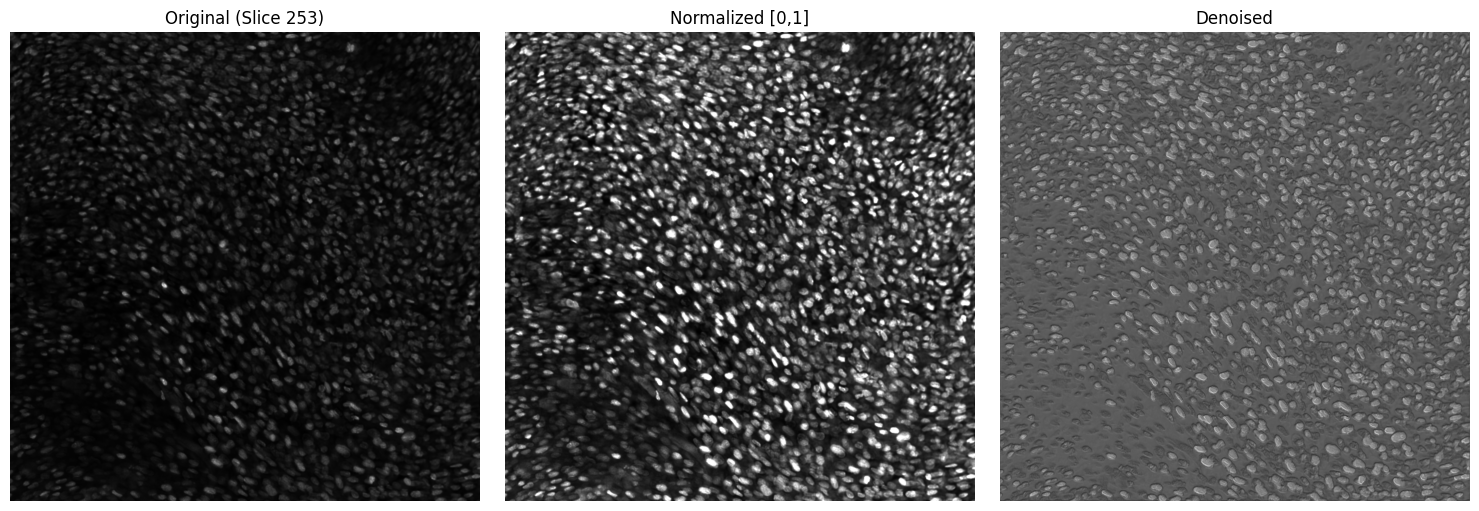

Original range: [63.0000, 30992.0000]
Normalized range: [0.0068, 1.0000]
Denoised range: [2222.1504, 2624.4331]


In [45]:
visualize_results(test_slice, normalized_test, denoised_test, middle_slice_idx)

In [46]:
def analyze_noise_profile(original, denoised):
    residual = original - denoised
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.hist(residual.ravel(), bins=200, range=(-0.5, 0.5))
    plt.title("Noise Distribution")
    
    plt.subplot(132)
    plt.scatter(original.ravel(), residual.ravel(), alpha=0.01, s=1)
    plt.xlabel("Original Intensity")
    plt.ylabel("Residual")
    plt.title("Noise vs Signal")
    
    plt.subplot(133)
    plt.imshow(residual, cmap='RdBu', vmin=-

SyntaxError: incomplete input (2793478572.py, line 16)

In [9]:
def create_n2v_config2(X_train):
    config = N2VConfig(
        X_train,
        unet_kern_size=3,
        train_steps_per_epoch=100,  # Increased steps
        train_epochs=50,           # More epochs
        train_loss='mae',            # Switch to MAE loss
        batch_norm=True,
        train_batch_size=16,        # Increased batch size
        n2v_perc_pix=0.3,           # Reduced masking percentage
        n2v_patch_shape=(64, 64),
        n2v_manipulator='uniform_withCP',
        n2v_neighborhood_radius=3,  # Increased for better context
        unet_n_depth=4,             # Deeper network
        unet_n_first=96,            # More filters
        unet_last_activation='linear',  # CRITICAL FIX
        train_tensorboard=False
    )
    return config

In [86]:
# =====================================
# CORRECTED OUTPUT RANGE DIAGNOSTIC
# =====================================
class OutputRangeDiagnostic(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.epoch_times = []
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time.time()
        
    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start
        self.epoch_times.append(epoch_time)
        avg_time = np.mean(self.epoch_times) if self.epoch_times else epoch_time
        
        # Get first validation sample
        sample = self.validation_data[0][:1] if isinstance(self.validation_data, tuple) else self.validation_data[:1]
        prediction = self.model.predict(sample, verbose=0)
        
        # Calculate statistics without .numpy() conversion
        print(f"\nEpoch {epoch+1} Diagnostics:")
        print(f"  Output Range: [{prediction.min():.4f}, {prediction.max():.4f}]")
        print(f"  Target Range: [{sample.min():.4f}, {sample.max():.4f}]")
        print(f"  Output Mean: {prediction.mean():.4f} | Target Mean: {sample.mean():.4f}")
        print(f"  Epoch Time: {epoch_time:.1f}s | Avg Time: {avg_time:.1f}s")
        
        # Calculate and print intensity distribution
        output_hist, bin_edges = np.histogram(prediction, bins=10, range=(0, 1))
        print("  Output Intensity Distribution:")
        for i in range(len(output_hist)):
            bin_range = f"{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}"
            print(f"    {bin_range}: {'*' * int(output_hist[i]/output_hist.max()*20)}")

In [87]:
def patched_prepare_for_training2(self, optimizer=None, **kwargs):
    """Patched method to fix weight saving and add diagnostics"""
    # Original callback setup
    self.callbacks = []
    
    def patched_save_weights(this, filepath, *args, **kwargs):
        if not str(filepath).endswith('.weights.h5'):
            filepath = Path(str(filepath).replace('.h5', '.weights.h5'))
        return this._original_save_weights(filepath, *args, **kwargs)

    if not hasattr(self.keras_model, "_original_save_weights"):
        self.keras_model._original_save_weights = self.keras_model.save_weights
        self.keras_model.save_weights = MethodType(patched_save_weights, self.keras_model)

    if self.config.train_checkpoint is not None:
        self.callbacks.append(
            ModelCheckpoint(
                str(self.logdir / self.config.train_checkpoint),
                save_best_only=True,
                save_weights_only=True
            )
        )
        self.callbacks.append(
            ModelCheckpoint(
                str(self.logdir / 'weights_now.weights.h5'),
                save_best_only=False,
                save_weights_only=True
            )
        )

    if self.config.train_tensorboard:
        from tensorflow.keras.callbacks import TensorBoard
        self.callbacks.append(TensorBoard(log_dir=str(self.logdir)))
        
    # Add our diagnostics callback to the model's internal callbacks
    if hasattr(self, 'diagnostic_callback'):
        self.callbacks.append(self.diagnostic_callback)

In [88]:
model_name = 'n2v_2D_test_20250610'
basedir = '../models'

In [89]:
config2 = create_n2v_config2(X_train)

In [90]:
model2 = N2V(config=config2, name=model_name, basedir=basedir)
model2.config.train_checkpoint = "weights_best.weights.h5"

In [91]:
# Create and attach diagnostic callback
model2.diagnostic_callback = OutputRangeDiagnostic(validation_data=X_val)

In [92]:
# Apply the patched prepare_for_training method
n2v_mod.N2V.prepare_for_training = patched_prepare_for_training

In [93]:
# Compile model
model2.keras_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

In [94]:
model2

N2V(n2v_2D_test_20250610): YXC → YXC
├─ Directory: /cephfs/volumes/hpc_data_prj/cmm_stroud/25f618d6-2e01-44f4-94db-6cac7f9ae884/models/n2v_2D_test_20250610
└─ N2VConfig(means=['0.18528885'], stds=['0.20374157'], n_dim=2, axes='YXC', n_channel_in=1, n_channel_out=1, unet_residual=False, unet_n_depth=4, unet_kern_size=3, unet_n_first=96, unet_last_activation='linear', unet_input_shape=(None, None, 1), train_loss='mae', train_epochs=50, train_steps_per_epoch=100, train_learning_rate=0.0004, train_batch_size=16, train_tensorboard=True, train_checkpoint='weights_best.weights.h5', train_reduce_lr={'factor': 0.5, 'patience': 10}, batch_norm=True, n2v_perc_pix=0.3, n2v_patch_shape=(64, 64), n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=3, single_net_per_channel=True, blurpool=False, skip_skipone=False, structN2Vmask=None, probabilistic=False)

🧪 Verifying training data...
X_train dtype: float32
X_train shape: (15870, 64, 64, 1)
X_train range: [0.0000, 1.0000]
NaN values: 0


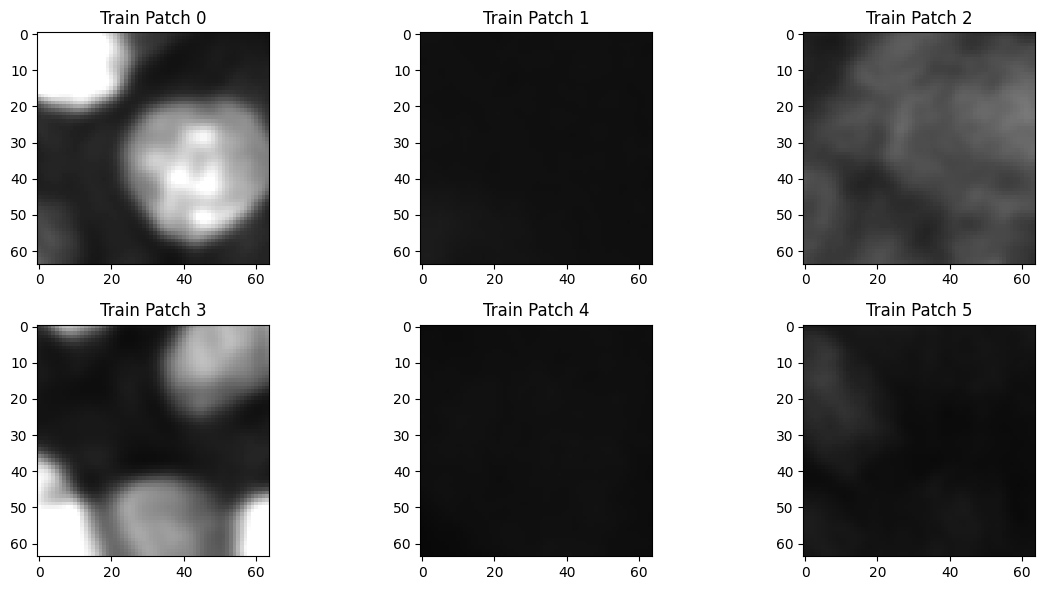

In [95]:
print("🧪 Verifying training data...")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_train shape: {X_train.shape}")
print(f"X_train range: [{X_train.min():.4f}, {X_train.max():.4f}]")
print(f"NaN values: {np.isnan(X_train).sum()}")

# Plot sample training patches
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(f'Train Patch {i}')
plt.tight_layout()
plt.show()

In [96]:
print("🧠 Model Architecture Summary:")
model2.keras_model.summary()

# Verify last layer activation
last_layer = model2.keras_model.layers[-1]
print(f"Last layer activation: {last_layer.activation.__name__ if hasattr(last_layer, 'activation') else 'None'}")

🧠 Model Architecture Summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, None, None, 1)]      0         []                            
                                                                                                  
 lambda_3 (Lambda)           (None, None, None, 1)        0         ['input[0][0]']               
                                                                                                  
 channel_0down_level_0_no_0  (None, None, None, 96)       960       ['lambda_3[0][0]']            
  (Conv2D)                                                                                        
                                                                                                  
 batch_normalization_50 (Ba  (None, None, None, 96)       384 

In [97]:
print("⚙️ Training Configuration:")
print(f"Loss function: {model2.keras_model.loss}")
print(f"Optimizer: {model2.keras_model.optimizer.get_config()}")
print(f"Batch size: {config2.train_batch_size}")
print(f"Steps per epoch: {config2.train_steps_per_epoch}")
print(f"Epochs: {config2.train_epochs}")

⚙️ Training Configuration:
Loss function: mse
Optimizer: {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 1e-04, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Batch size: 16
Steps per epoch: 100
Epochs: 50


In [100]:
# =====================================
# COMPLETELY REVISED DIAGNOSTIC APPROACH
# =====================================
# Remove the OutputRangeDiagnostic class and replace with:

def enhanced_model_training(model, X_train, X_val):
    """Custom training function with built-in diagnostics"""
    print("🚀 Starting enhanced training with diagnostics...")
    history = {'loss': [], 'val_loss': []}
    best_val_loss = float('inf')
    
    for epoch in range(model.config.train_epochs):
        epoch_start = time.time()
        print(f"\nEpoch {epoch+1}/{model.config.train_epochs}")
        
        # Training
        train_losses = []
        for i in range(model.config.train_steps_per_epoch):
            # Get batch of data
            idx = np.random.randint(0, len(X_train), model.config.train_batch_size)
            batch = X_train[idx]
            
            # Train on batch
            loss = model.keras_model.train_on_batch(batch, batch)
            train_losses.append(loss)
            
        # Validation
        val_losses = []
        val_outputs = []
        for i in range(0, len(X_val), model.config.train_batch_size):
            batch = X_val[i:i+model.config.train_batch_size]
            val_loss = model.keras_model.test_on_batch(batch, batch)
            val_losses.append(val_loss)
            val_outputs.append(model.keras_model.predict_on_batch(batch))
        
        # Calculate metrics
        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
        val_output = np.concatenate(val_outputs)
        
        # Record history
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        
        # Print diagnostics
        epoch_time = time.time() - epoch_start
        print(f"  Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")
        print(f"  Output Range: [{val_output.min():.4f}, {val_output.max():.4f}]")
        print(f"  Output Mean: {val_output.mean():.4f} | Time: {epoch_time:.1f}s")
        
        # Checkpoint model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            model.keras_model.save_weights(str(model.logdir / 'weights_best.weights.h5'))
            print("  💾 Saved best weights")
    
    return history

# =====================================
# MODIFIED TRAINING SECTION
# =====================================
# In main(), replace the training code:
print("🚂 Starting training...")
start_time = time.time()

# Use our custom training function
history = enhanced_model_training(model2, X_train, X_val)

training_time = time.time() - start_time
print(f"⏱️ Training completed in {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

🚂 Starting training...
🚀 Starting enhanced training with diagnostics...

Epoch 1/50
  Train loss: 0.0916 | Val loss: 0.0980
  Output Range: [-0.0642, 0.2024]
  Output Mean: 0.0816 | Time: 14.4s
  💾 Saved best weights

Epoch 2/50
  Train loss: 0.0353 | Val loss: 0.0864
  Output Range: [-0.0634, 0.3572]
  Output Mean: 0.1015 | Time: 5.5s
  💾 Saved best weights

Epoch 3/50
  Train loss: 0.0275 | Val loss: 0.0750
  Output Range: [-0.1138, 0.5270]
  Output Mean: 0.1773 | Time: 5.6s
  💾 Saved best weights

Epoch 4/50
  Train loss: 0.0214 | Val loss: 0.0580
  Output Range: [-0.1163, 0.7272]
  Output Mean: 0.1825 | Time: 5.5s
  💾 Saved best weights

Epoch 5/50
  Train loss: 0.0206 | Val loss: 0.0411
  Output Range: [-0.1595, 0.9206]
  Output Mean: 0.1761 | Time: 5.6s
  💾 Saved best weights

Epoch 6/50
  Train loss: 0.0186 | Val loss: 0.0299
  Output Range: [-0.3176, 1.1480]
  Output Mean: 0.1857 | Time: 5.5s
  💾 Saved best weights

Epoch 7/50
  Train loss: 0.0183 | Val loss: 0.0147
  Output Ra


🔍 Analyzing model output characteristics...
1/1 [==============================] - 0s 17ms/step


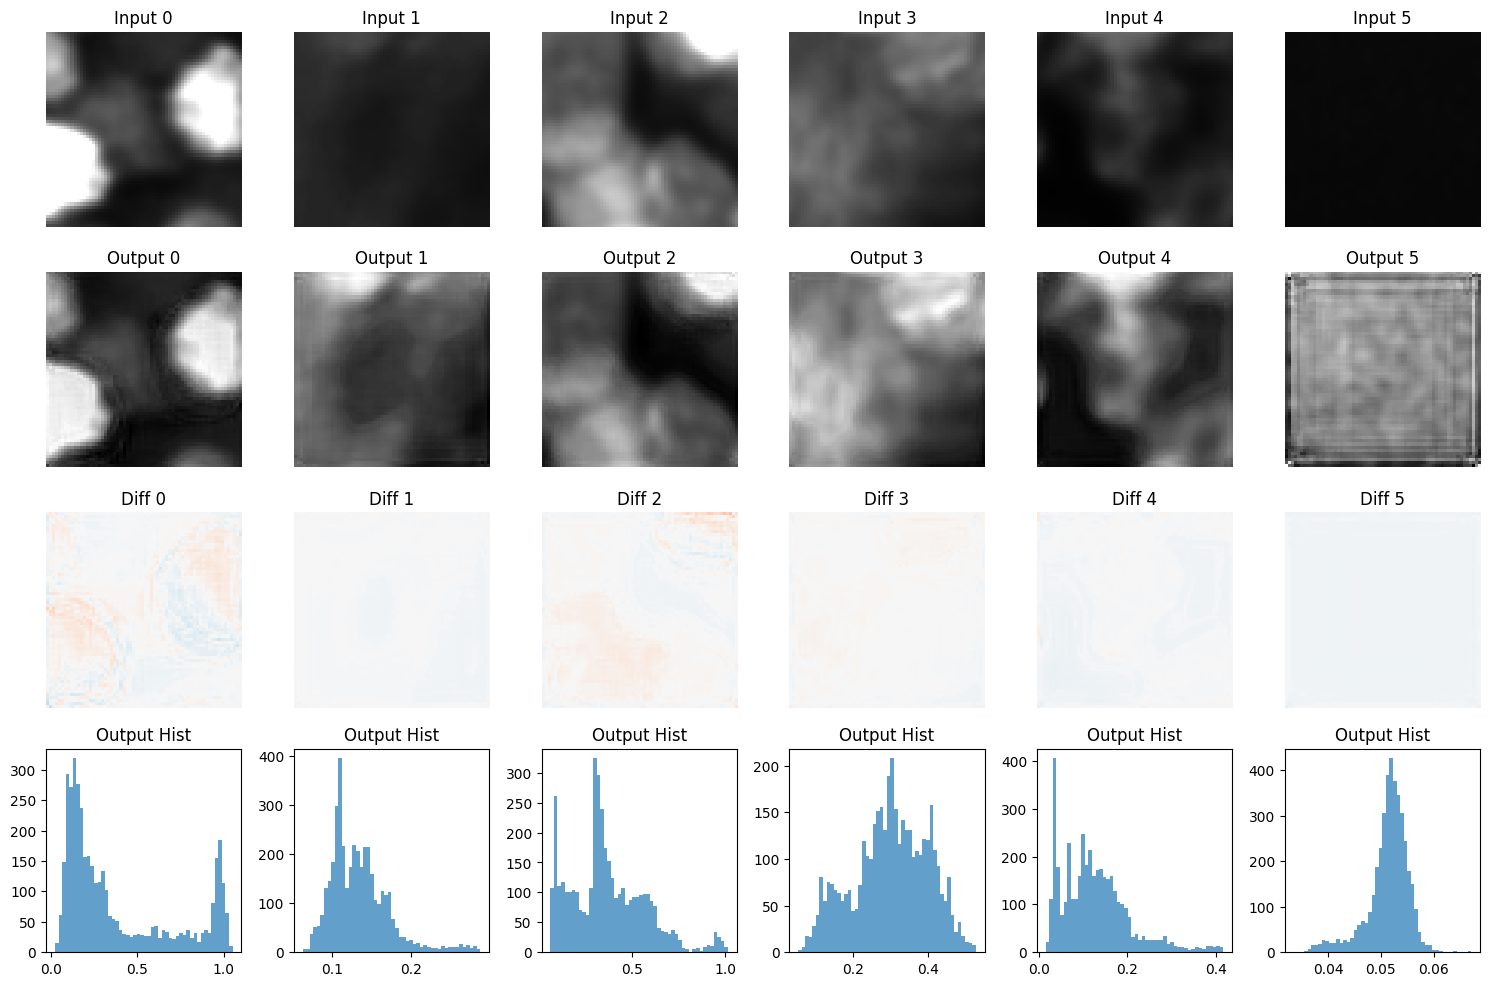

Output Statistics:
Min: 0.0148 | Max: 1.0594
Mean: 0.2374 | Std: 0.2530
% values < 0.1: 44.1%
% values > 0.9: 6.3%


In [109]:
def model_output_analysis(model, X_val):
    """Analyze model output characteristics"""
    print("\n🔍 Analyzing model output characteristics...")
    sample = X_val[100:116]  
    predictions = model.keras_model.predict(sample, batch_size=16)
    
    plt.figure(figsize=(15, 10))
    for i in range(6):
        # Input
        plt.subplot(4, 6, i+1)
        plt.imshow(sample[i].squeeze(), cmap='gray', vmin=0, vmax=1)
        plt.title(f'Input {i}')
        plt.axis('off')
        
        # Output
        plt.subplot(4, 6, i+7)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title(f'Output {i}')
        plt.axis('off')
        
        # Difference
        plt.subplot(4, 6, i+13)
        diff = predictions[i].squeeze() - sample[i].squeeze()
        plt.imshow(diff, cmap='RdBu', vmin=-0.5, vmax=0.5)
        plt.title(f'Diff {i}')
        plt.axis('off')
        
        # Histogram
        plt.subplot(4, 6, i+19)
        plt.hist(predictions[i].ravel(), bins=50, alpha=0.7)
        plt.title('Output Hist')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("Output Statistics:")
    print(f"Min: {predictions.min():.4f} | Max: {predictions.max():.4f}")
    print(f"Mean: {predictions.mean():.4f} | Std: {predictions.std():.4f}")
    print(f"% values < 0.1: {np.mean(predictions < 0.1)*100:.1f}%")
    print(f"% values > 0.9: {np.mean(predictions > 0.9)*100:.1f}%")

# Call after training:
model_output_analysis(model2, X_val)

In [102]:
denoised_test2 = predict_with_per_slice_norm(model2, test_slice)

The input image is of type float64 and will be casted to float32 for prediction.


100%|██████████| 16/16 [00:00<00:00, 19.57it/s]  


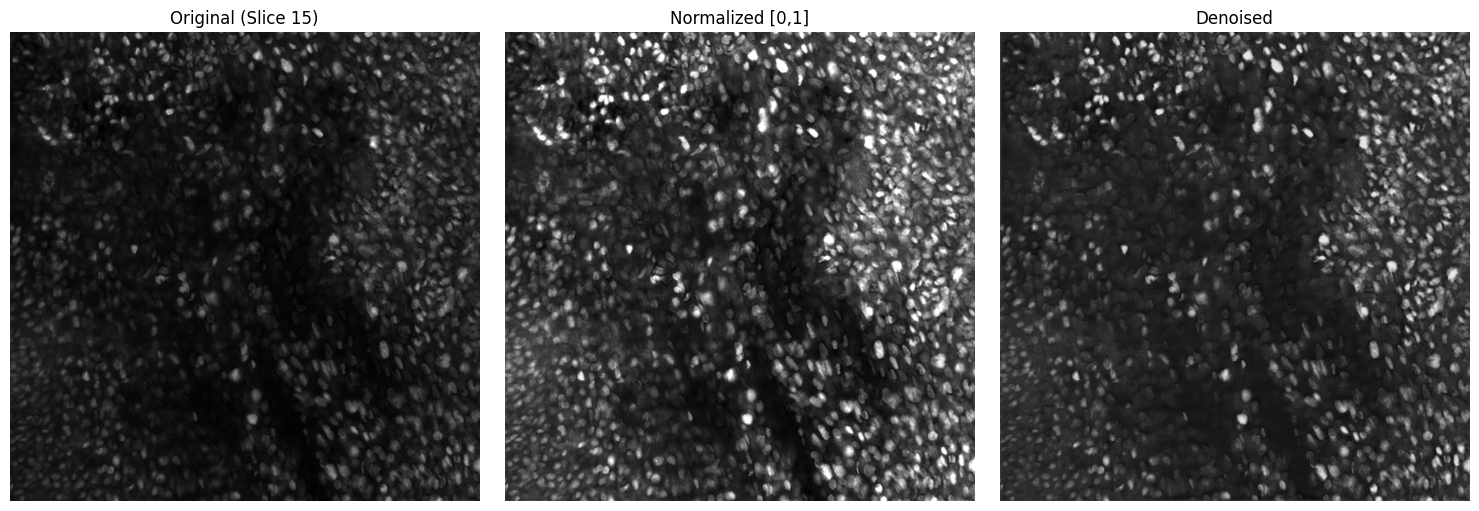

Original range: [347.0000, 20301.0000]
Normalized range: [0.0377, 1.0000]
Denoised range: [501.5057, 12707.9131]


In [103]:
visualize_results(test_slice, normalized_test, denoised_test2, 15)

## Loading a previously trained N2V model

In [10]:
# Path to the saved model
model_dir = "../models/n2v_2D_test_20250610"
weights_path = os.path.join(model_dir, "weights_best.weights.h5")

# Load the model configuration and weights
model = N2V(config=None, name='n2v_2D_test_20250610', basedir='../models')
model.keras_model.load_weights(weights_path)
print("✅ Model loaded successfully!")

Loading network weights from 'weights_best.weights.h5'.
✅ Model loaded successfully!


In [11]:
model

N2V(n2v_2D_test_20250610): YXC → YXC
├─ Directory: /cephfs/volumes/hpc_data_prj/cmm_stroud/25f618d6-2e01-44f4-94db-6cac7f9ae884/models/n2v_2D_test_20250610
└─ N2VConfig(probabilistic=False, means=['0.18528885'], stds=['0.20374157'], n_dim=2, axes='YXC', n_channel_in=1, n_channel_out=1, unet_residual=False, unet_n_depth=4, unet_kern_size=3, unet_n_first=96, unet_last_activation='linear', unet_input_shape=[None, None, 1], train_loss='mae', train_epochs=50, train_steps_per_epoch=100, train_learning_rate=0.0004, train_batch_size=16, train_tensorboard=True, train_checkpoint='weights_best.h5', train_reduce_lr={'factor': 0.5, 'patience': 10}, batch_norm=True, n2v_perc_pix=0.3, n2v_patch_shape=[64, 64], n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=3, single_net_per_channel=True, blurpool=False, skip_skipone=False, structN2Vmask=None)

In [12]:
def predict_large_tiff_improved(model, input_path, output_path, batch_size=4):
    """Optimized prediction for large 3D volumes"""
    print("🚀 Starting 3D volume prediction...")
    
    # Memory-map the input TIFF
    mmapped = tifffile.memmap(input_path)
    z_size, y_size, x_size = mmapped.shape
    total_slices = z_size
    
    print(f"📊 Volume dimensions: Z={z_size}, Y={y_size}, X={x_size}")
    print(f"🔢 Processing {total_slices} slices in batches of {batch_size}")
    
    # Create output writer
    with tifffile.TiffWriter(output_path, bigtiff=True) as tif_out:
        for start_z in tqdm(range(0, z_size, batch_size), desc="Processing Batches"):
            end_z = min(start_z + batch_size, z_size)
            batch = mmapped[start_z:end_z]
            
            denoised_batch = np.zeros_like(batch, dtype=np.float32)
            
            for i in range(batch.shape[0]):
                slice_idx = start_z + i
                slice_2d = batch[i]
                
                # Skip empty slices
                if np.std(slice_2d) < 1e-6:
                    denoised_batch[i] = slice_2d
                    continue
                
                # Apply CLAHE for contrast enhancement (optional but recommended)
                # slice_2d = exposure.equalize_adapthist(slice_2d, clip_limit=0.03)
                
                # Predict with slice-wise normalization
                denoised_slice = predict_with_per_slice_norm(model, slice_2d)
                denoised_batch[i] = denoised_slice
                
                # Print progress every 10 slices
                if slice_idx % 10 == 0:
                    print(f"✅ Processed slice {slice_idx}/{total_slices}")
            
            # Write entire batch to disk
            tif_out.write(denoised_batch, contiguous=True)
    
    print(f"🎉 Denoising complete! Output saved to: {output_path}")

In [15]:
# Define input and output paths
input_path = "../Image_Data/E14.5_TOGF_noCre_data/Deconvolved_data/250410_12.59.39_RA_Ventral_500um_Current.cube.tif"
output_path = "../Image_Data/E14.5_denoised/denoised_RA_Ventral.tif"

# Run prediction
predict_large_tiff_improved(
    model=model,
    input_path=input_path,
    output_path=output_path,
    batch_size=4
)

🚀 Starting 3D volume prediction...
📊 Volume dimensions: Z=506, Y=2048, X=2048
🔢 Processing 506 slices in batches of 4


Processing Batches:   0%|          | 0/127 [00:00<?, ?it/s]

The input image is of type float64 and will be casted to float32 for prediction.


2025-06-11 15:20:19.565020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2025-06-11 15:20:24.139908: W tensorflow/tsl/framework/bfc_allocator.cc:366] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2025-06-11 15:20:47.940445: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.94GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-11 15:20:47.940493: W tensorflo

✅ Processed slice 0/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
/tmp/ipykernel_1710620/1462837456.py:42: DeprecationWarning: <tifffile.TiffWriter.write> data with shape (4, 2048, 2048) and dtype 'float32' are stored as RGB with separate component planes. Future versions will store such data as MINISBLACK in separate pages by default, unless the 'photometric' and 'planarconfig' parameters are specified.
  tif_out.write(denoised_batch, contiguous=True)
Processing Batches:   1%|          | 1/127 [00:44<1:33:14, 44.40s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   2%|▏         | 2/127 [00:55<51:28, 24.71s/it]  

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


✅ Processed slice 10/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   2%|▏         | 3/127 [01:06<38:03, 18.42s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   3%|▎         | 4/127 [01:17<31:43, 15.48s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   4%|▍         | 5/127 [01:28<28:08, 13.84s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 20/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   5%|▍         | 6/127 [01:39<25:55, 12.86s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   6%|▌         | 7/127 [01:50<24:28, 12.24s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.94it/s]


✅ Processed slice 30/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   6%|▋         | 8/127 [02:01<23:37, 11.91s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   7%|▋         | 9/127 [02:12<22:52, 11.63s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   8%|▊         | 10/127 [02:23<22:18, 11.44s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 40/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   9%|▊         | 11/127 [02:34<21:50, 11.30s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:   9%|▉         | 12/127 [02:45<21:28, 11.21s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 50/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  10%|█         | 13/127 [02:56<21:08, 11.13s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  11%|█         | 14/127 [03:07<20:51, 11.07s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  12%|█▏        | 15/127 [03:18<20:37, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 60/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  13%|█▎        | 16/127 [03:29<20:23, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  13%|█▎        | 17/127 [03:40<20:12, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 70/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  14%|█▍        | 18/127 [03:51<19:59, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  15%|█▍        | 19/127 [04:02<19:47, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  16%|█▌        | 20/127 [04:13<19:33, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 80/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  17%|█▋        | 21/127 [04:23<19:22, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  17%|█▋        | 22/127 [04:34<19:10, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 90/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  18%|█▊        | 23/127 [04:45<18:59, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  19%|█▉        | 24/127 [04:56<18:48, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  20%|█▉        | 25/127 [05:07<18:36, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


✅ Processed slice 100/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.84it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.34it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  20%|██        | 26/127 [05:19<18:37, 11.06s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.33it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  21%|██▏       | 27/127 [05:30<18:24, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 110/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  22%|██▏       | 28/127 [05:41<18:11, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  23%|██▎       | 29/127 [05:52<17:58, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  24%|██▎       | 30/127 [06:02<17:46, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 120/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  24%|██▍       | 31/127 [06:13<17:33, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  25%|██▌       | 32/127 [06:24<17:21, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 130/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  26%|██▌       | 33/127 [06:35<17:11, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  27%|██▋       | 34/127 [06:46<17:00, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  28%|██▊       | 35/127 [06:57<16:49, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


✅ Processed slice 140/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  28%|██▊       | 36/127 [07:08<16:38, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  29%|██▉       | 37/127 [07:19<16:26, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 150/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  30%|██▉       | 38/127 [07:30<16:16, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  31%|███       | 39/127 [07:41<16:04, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  31%|███▏      | 40/127 [07:52<15:52, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 160/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  32%|███▏      | 41/127 [08:03<15:42, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  33%|███▎      | 42/127 [08:14<15:31, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 170/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  34%|███▍      | 43/127 [08:25<15:19, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.79it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.34it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  35%|███▍      | 44/127 [08:36<15:18, 11.07s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  35%|███▌      | 45/127 [08:47<15:05, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 180/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  36%|███▌      | 46/127 [08:58<14:52, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  37%|███▋      | 47/127 [09:09<14:39, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 190/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  38%|███▊      | 48/127 [09:20<14:27, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  39%|███▊      | 49/127 [09:31<14:14, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.50it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  39%|███▉      | 50/127 [09:42<14:03, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 200/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  40%|████      | 51/127 [09:53<13:52, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  41%|████      | 52/127 [10:04<13:41, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


✅ Processed slice 210/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  42%|████▏     | 53/127 [10:15<13:30, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  43%|████▎     | 54/127 [10:26<13:20, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  43%|████▎     | 55/127 [10:37<13:09, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 220/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  44%|████▍     | 56/127 [10:48<12:58, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  45%|████▍     | 57/127 [10:59<12:48, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 230/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  46%|████▌     | 58/127 [11:10<12:36, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  46%|████▋     | 59/127 [11:21<12:26, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  47%|████▋     | 60/127 [11:32<12:15, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 240/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  48%|████▊     | 61/127 [11:43<12:03, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.81it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.29it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  49%|████▉     | 62/127 [11:54<12:00, 11.09s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.40it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 250/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  50%|████▉     | 63/127 [12:05<11:47, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  50%|█████     | 64/127 [12:16<11:34, 11.03s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  51%|█████     | 65/127 [12:27<11:22, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


✅ Processed slice 260/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  52%|█████▏    | 66/127 [12:38<11:10, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  53%|█████▎    | 67/127 [12:49<10:59, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


✅ Processed slice 270/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  54%|█████▎    | 68/127 [13:00<10:48, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  54%|█████▍    | 69/127 [13:11<10:36, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  55%|█████▌    | 70/127 [13:22<10:25, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 280/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  56%|█████▌    | 71/127 [13:33<10:14, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  57%|█████▋    | 72/127 [13:44<10:04, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 290/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  57%|█████▋    | 73/127 [13:55<09:53, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  58%|█████▊    | 74/127 [14:06<09:41, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  59%|█████▉    | 75/127 [14:17<09:30, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 300/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  60%|█████▉    | 76/127 [14:28<09:19, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  61%|██████    | 77/127 [14:39<09:09, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 310/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  61%|██████▏   | 78/127 [14:50<08:58, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.01it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.21it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.27it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  62%|██████▏   | 79/127 [15:01<08:53, 11.12s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.73it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.30it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  63%|██████▎   | 80/127 [15:12<08:47, 11.22s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.38it/s]


✅ Processed slice 320/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  64%|██████▍   | 81/127 [15:24<08:34, 11.19s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.22it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.19it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.32it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  65%|██████▍   | 82/127 [15:35<08:26, 11.26s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.36it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 330/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  65%|██████▌   | 83/127 [15:46<08:13, 11.21s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  66%|██████▌   | 84/127 [15:57<07:59, 11.14s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  67%|██████▋   | 85/127 [16:08<07:45, 11.08s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 340/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  68%|██████▊   | 86/127 [16:19<07:32, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  69%|██████▊   | 87/127 [16:30<07:20, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 350/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  69%|██████▉   | 88/127 [16:41<07:08, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  70%|███████   | 89/127 [16:52<06:57, 10.98s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  71%|███████   | 90/127 [17:03<06:46, 10.97s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 360/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  72%|███████▏  | 91/127 [17:14<06:34, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  72%|███████▏  | 92/127 [17:25<06:23, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 370/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  73%|███████▎  | 93/127 [17:36<06:12, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.49it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  74%|███████▍  | 94/127 [17:47<06:01, 10.95s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  75%|███████▍  | 95/127 [17:58<05:50, 10.96s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


✅ Processed slice 380/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.04it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  76%|███████▌  | 96/127 [18:09<05:42, 11.04s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.36it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  76%|███████▋  | 97/127 [18:20<05:31, 11.04s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.61it/s]


✅ Processed slice 390/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  77%|███████▋  | 98/127 [18:31<05:23, 11.16s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.28it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.39it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.38it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  78%|███████▊  | 99/127 [18:42<05:12, 11.16s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.39it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  79%|███████▊  | 100/127 [18:53<04:59, 11.11s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 400/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  80%|███████▉  | 101/127 [19:04<04:47, 11.07s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  80%|████████  | 102/127 [19:15<04:36, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


✅ Processed slice 410/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  81%|████████  | 103/127 [19:26<04:24, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  82%|████████▏ | 104/127 [19:37<04:13, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  83%|████████▎ | 105/127 [19:48<04:01, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


✅ Processed slice 420/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  83%|████████▎ | 106/127 [19:59<03:50, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  84%|████████▍ | 107/127 [20:10<03:39, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.33it/s]


✅ Processed slice 430/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  85%|████████▌ | 108/127 [20:21<03:29, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  86%|████████▌ | 109/127 [20:32<03:18, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  87%|████████▋ | 110/127 [20:43<03:07, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


✅ Processed slice 440/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  87%|████████▋ | 111/127 [20:54<02:56, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.26it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  88%|████████▊ | 112/127 [21:06<02:45, 11.06s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.39it/s]


✅ Processed slice 450/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  89%|████████▉ | 113/127 [21:17<02:34, 11.06s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.40it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  90%|████████▉ | 114/127 [21:28<02:23, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.37it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  91%|█████████ | 115/127 [21:39<02:12, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.41it/s]


✅ Processed slice 460/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.48it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  5.80it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  91%|█████████▏| 116/127 [21:50<02:02, 11.14s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.24it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.39it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.38it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  92%|█████████▏| 117/127 [22:01<01:51, 11.14s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.39it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.40it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


✅ Processed slice 470/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  93%|█████████▎| 118/127 [22:12<01:40, 11.11s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  94%|█████████▎| 119/127 [22:23<01:28, 11.08s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  94%|█████████▍| 120/127 [22:34<01:17, 11.05s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 480/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  95%|█████████▌| 121/127 [22:45<01:06, 11.03s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  96%|█████████▌| 122/127 [22:56<00:55, 11.02s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 490/506
The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  97%|█████████▋| 123/127 [23:07<00:44, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.42it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  98%|█████████▊| 124/127 [23:18<00:33, 11.01s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.46it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.44it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.43it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  98%|█████████▊| 125/127 [23:29<00:21, 11.00s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


✅ Processed slice 500/506
The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.47it/s]


The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches:  99%|█████████▉| 126/127 [23:40<00:10, 10.99s/it]

The input image is of type float64 and will be casted to float32 for prediction.



100%|██████████| 16/16 [00:02<00:00,  6.45it/s]


The input image is of type float64 and will be casted to float32 for prediction.



Processing Batches: 100%|██████████| 127/127 [23:46<00:00, 11.23s/it]


🎉 Denoising complete! Output saved to: ../Image_Data/E14.5_denoised/denoised_RA_Ventral.tif
